## Overview

This project analyzes depression data from a survey, found here: https://www.kaggle.com/francispython/b-depression

I explore the data looking for correlations between various data points and depression. Major depression disorder is among the most prevelant mental disorders in the Unitd States.  It is diagnosed when a person experiences depressed mood for at least 2 weeks, combined with certain specfied symptoms which shows problems with biological functioning and ability to enjoy life. 



## Business Problem

A mental health agency is interested in if there's a way to check for depression in clients based on survey results. They're also curious about what survey questions to pay attention to as either risk factors or protective factors for depression. 

## Data Understanding

This section focuses on exploring the dataset.  The data was already split into test and train files. However, the testing data was missing depression values for most entries. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    plot_confusion_matrix
)

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [4]:
df_train.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,...,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,...,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,717.000000,57.000000,1.000000,30.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1078.500000,105.500000,1.000000,41.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,91.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,...,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780,1.000000,1.000000,6.000000


In [5]:
df_test['depressed'].describe()
## it only has 4 values... so I need to combine the datasets 

count    4.00
mean     0.25
std      0.50
min      0.00
25%      0.00
50%      0.00
75%      0.25
max      1.00
Name: depressed, dtype: float64

In [6]:
df_test['depressed'].isna().sum()

282

## Data Preparation 

I combine the data sets and drop all rows with missing value for depressed. I then explore the values. 

In [7]:
df = pd.concat([df_train, df_test])
df.shape

(1429, 75)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 285
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surveyid                 1429 non-null   int64  
 1   village                  1429 non-null   int64  
 2   survey_date              1429 non-null   object 
 3   femaleres                1429 non-null   int64  
 4   age                      1428 non-null   object 
 5   married                  1429 non-null   int64  
 6   children                 1429 non-null   int64  
 7   hhsize                   1429 non-null   int64  
 8   edu                      1429 non-null   int64  
 9   hh_children              1429 non-null   int64  
 10  hh_totalmembers          1005 non-null   float64
 11  cons_nondurable          1429 non-null   float64
 12  asset_livestock          1429 non-null   float64
 13  asset_durable            1429 non-null   float64
 14  asset_phone              

In [9]:
df['depressed'].value_counts(normalize = True)

0.0    0.830863
1.0    0.169137
Name: depressed, dtype: float64

In [10]:
df['survey_date'].head()

0    23-Nov-61
1    24-Oct-61
2    05-Oct-61
3    23-Sep-61
4    12-Sep-61
Name: survey_date, dtype: object

In [11]:
df.isna().sum()

surveyid                0
village                 0
survey_date             0
femaleres               0
age                     1
                     ... 
saved_mpesa             0
amount_saved_mpesa      0
early_survey            0
depressed             282
day_of_week             0
Length: 75, dtype: int64

In [12]:
#drop those with missing depressed values, considering that's 
#what we're predicting 
df = df[df['depressed'].notna()]
df.describe()

,surveyid,village,femaleres,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,813.000000,1147.000000,...,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,715.646905,76.370532,0.917175,0.771578,2.858762,4.866609,8.726242,2.020052,4.901599,128.657487,...,0.015693,0.551532,0.066260,3.552145,3.000613,0.190061,2.261253,0.098518,0.169137,3.292066
std,415.138437,66.796515,0.275737,0.419999,1.848805,2.124114,2.873123,2.017926,2.102698,140.145204,...,0.124340,6.477887,0.248844,24.908206,25.796114,0.392520,19.642346,0.298144,0.375036,1.683810
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,352.500000,23.000000,1.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,716.000000,57.000000,1.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,107.613750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1077.000000,105.500000,1.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,189.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,1431.609100,...,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780,1.000000,1.000000,6.000000


In [13]:
df['children'].value_counts()

3     256
2     244
4     178
1     147
0     123
5      96
6      57
7      30
8      13
9       2
10      1
Name: children, dtype: int64

In [14]:
df_nan = df[df.columns[df.isna().any()]]

In [15]:
df_nan.shape

(1147, 23)

In [16]:
df_nan.isna().sum()

hh_totalmembers             334
cons_alcohol                 44
cons_tobacco                 20
cons_med_children           420
fs_chskipm_often            417
fs_chwholed_often           417
fs_meat                     334
fs_enoughtom                334
fs_sleephun                 334
med_expenses_hh_ep          694
med_expenses_sp_ep          881
med_expenses_child_ep       601
med_portion_sickinjured     334
med_port_sick_child         417
med_afford_port             423
med_sickdays_hhave          334
med_healthconsult           423
med_u5_deaths              1088
ed_expenses                 464
ed_expenses_perkid          464
ed_schoolattend             464
ed_sch_missedpc             468
ed_work_act_pc              574
dtype: int64

In [17]:
df_nan.describe()

,hh_totalmembers,cons_alcohol,cons_tobacco,cons_med_children,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,...,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc
count,813.000000,1103.000000,1127.000000,727.000000,730.000000,730.000000,813.000000,813.000000,813.000000,453.000000,...,730.000000,724.000000,813.000000,724.000000,59.000000,683.000000,683.000000,683.000000,679.000000,573.000000
mean,4.901599,1.174514,0.632551,1.822095,2.889041,0.439041,3.068881,0.273063,0.369004,5.646646,...,0.498053,0.798012,1.957681,0.694792,0.510452,52.741662,18.547923,0.704224,1.355537,0.746539
std,2.102698,6.731644,2.741528,10.901540,5.266559,1.674892,2.202256,0.445807,0.482832,10.917892,...,0.374240,0.329825,3.351370,0.375593,0.222380,117.046048,31.501996,0.342185,2.683900,0.837063
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.920884,...,0.166667,0.666667,0.000000,0.500000,0.333333,9.609222,3.843689,0.500000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.622517,...,0.500000,1.000000,1.000000,1.000000,0.500000,22.421518,8.968607,0.800000,0.333333,0.500000
75%,6.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,1.000000,1.000000,5.885648,...,1.000000,1.000000,2.500000,1.000000,0.500000,43.962190,19.218445,1.000000,1.708333,1.000000
max,12.000000,104.671880,41.868752,206.598270,20.000000,20.000000,22.000000,1.000000,1.000000,124.172510,...,1.000000,1.000000,31.000000,1.000000,1.000000,1601.537000,186.845990,1.500000,30.000000,5.000000


In [18]:
#drop med_uf_deaths because it only has 59 values... 
df = df.drop(columns=['med_u5_deaths'], axis=1)

### Categories

This section breaks down the data into different subgroups.  There may be some relation of school attendance as a protective factor. Most elements by themselves do not seem to be strongly correlated with depression. 

In [19]:
ed = ['ed_expenses', 'ed_expenses_perkid', 'ed_schoolattend', 'ed_sch_missedpc', 'ed_work_act_pc']
df_ed = df[ed]
df_ed.describe()

,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc
count,683.000000,683.000000,683.000000,679.000000,573.000000
mean,52.741662,18.547923,0.704224,1.355537,0.746539
std,117.046048,31.501996,0.342185,2.683900,0.837063
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.609222,3.843689,0.500000,0.000000,0.000000
50%,22.421518,8.968607,0.800000,0.333333,0.500000
75%,43.962190,19.218445,1.000000,1.708333,1.000000
max,1601.537000,186.845990,1.500000,30.000000,5.000000


In [20]:
df['ed_schoolattend'].value_counts()

1.000000    292
0.000000     94
0.500000     86
0.666667     73
0.750000     50
0.800000     32
0.333333     15
0.833333     13
0.600000     12
0.857143      4
0.571429      4
0.714286      3
0.400000      2
0.777778      1
0.250000      1
1.500000      1
Name: ed_schoolattend, dtype: int64

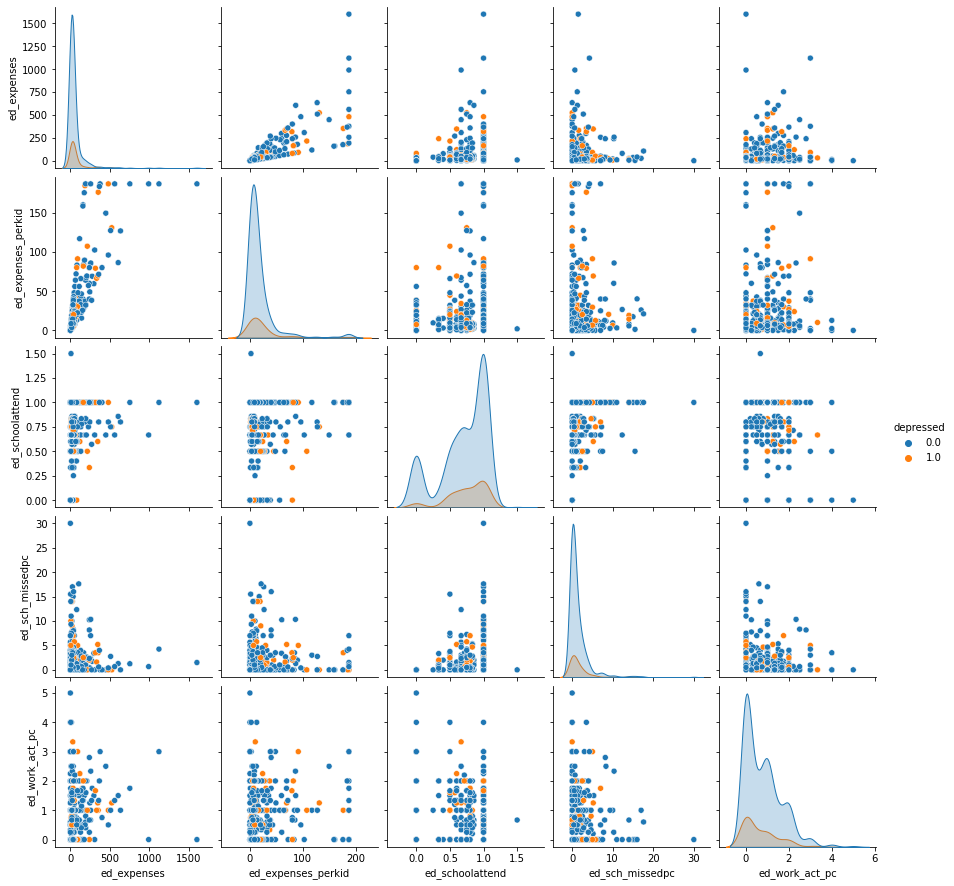

In [21]:
sns.pairplot(df, x_vars=ed,
            y_vars=ed,
            hue='depressed')

#education seems to be a protective feature 

In [22]:
med = ['med_expenses_hh_ep', 'med_expenses_sp_ep', 'med_expenses_child_ep', 'med_portion_sickinjured', 'med_port_sick_child',
      'med_afford_port', 'med_sickdays_hhave', 'med_healthconsult']
df_med = df[med]
df_med.describe()

,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult
count,453.000000,266.000000,546.000000,813.000000,730.000000,724.000000,813.000000,724.000000
mean,5.646646,8.142009,3.735272,0.521872,0.498053,0.798012,1.957681,0.694792
std,10.917892,17.966662,14.606003,0.321934,0.374240,0.329825,3.351370,0.375593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920884,0.740711,0.548526,0.250000,0.166667,0.666667,0.000000,0.500000
50%,2.622517,3.203074,1.494768,0.500000,0.500000,1.000000,1.000000,1.000000
75%,5.885648,8.007685,4.003842,0.750000,1.000000,1.000000,2.500000,1.000000
max,124.172510,184.176760,320.307400,2.000000,1.000000,1.000000,31.000000,1.000000


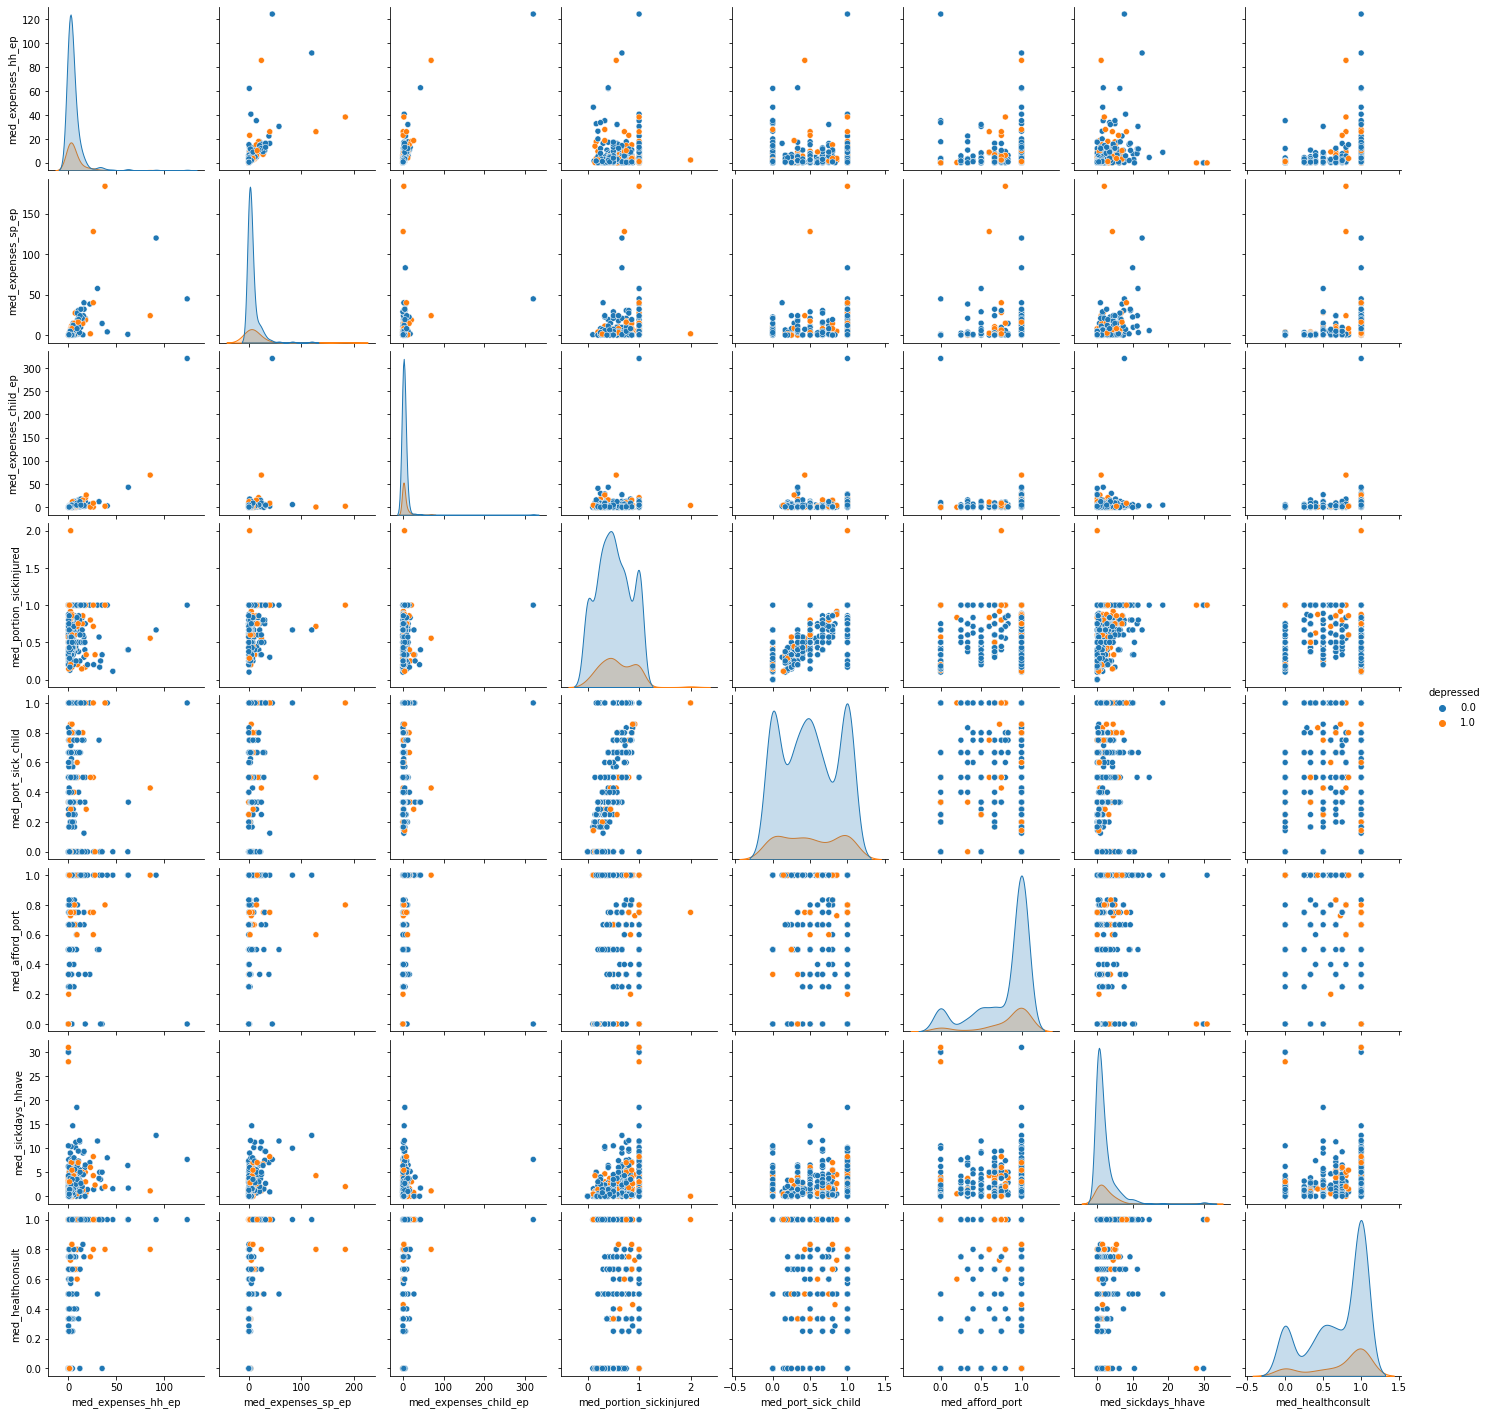

In [23]:
sns.pairplot(df, x_vars=med,
            y_vars=med,
            hue='depressed')

In [24]:
cons = ['cons_allfood', 'cons_ownfood', 'cons_alcohol', 'cons_tobacco', 'cons_med_total', 'cons_med_children',
       'cons_ed', 'cons_social', 'cons_other', 'cons_nondurable']
df_cons = df[cons]
df_cons.describe()

#maybe make cons_alcohol and cons_tobacco, cons_med_total, cons_med_children categorical 


,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,cons_nondurable
count,1147.000000,1147.000000,1103.000000,1127.000000,1147.000000,727.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,95.951699,8.305256,1.174514,0.632551,2.681046,1.822095,2.787015,3.652535,21.829243,128.657487
std,114.427881,15.126559,6.731644,2.741528,12.120835,10.901540,8.318368,7.568075,28.552299,140.145204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.759575,3.203074,0.000000,0.000000,0.000000,0.000000,0.467115,1.302583,13.853295,107.613750
75%,136.916635,9.715991,0.000000,0.000000,0.000000,0.000000,2.402306,3.843689,30.989741,189.290000
max,1386.966300,181.574260,104.671880,41.868752,206.598270,206.598270,133.461410,140.134490,289.093440,1431.609100


In [25]:
df['cons_alcohol'] = np.where(df['cons_alcohol']!= 0, True, False)
df['cons_tobacco'] = np.where(df['cons_tobacco']!=0, True, False)
df['cons_med_total'] = np.where(df['cons_med_total']!= 0, True, False)
df['cons_med_children'] = np.where(df['cons_med_children']!= 0, True, False)



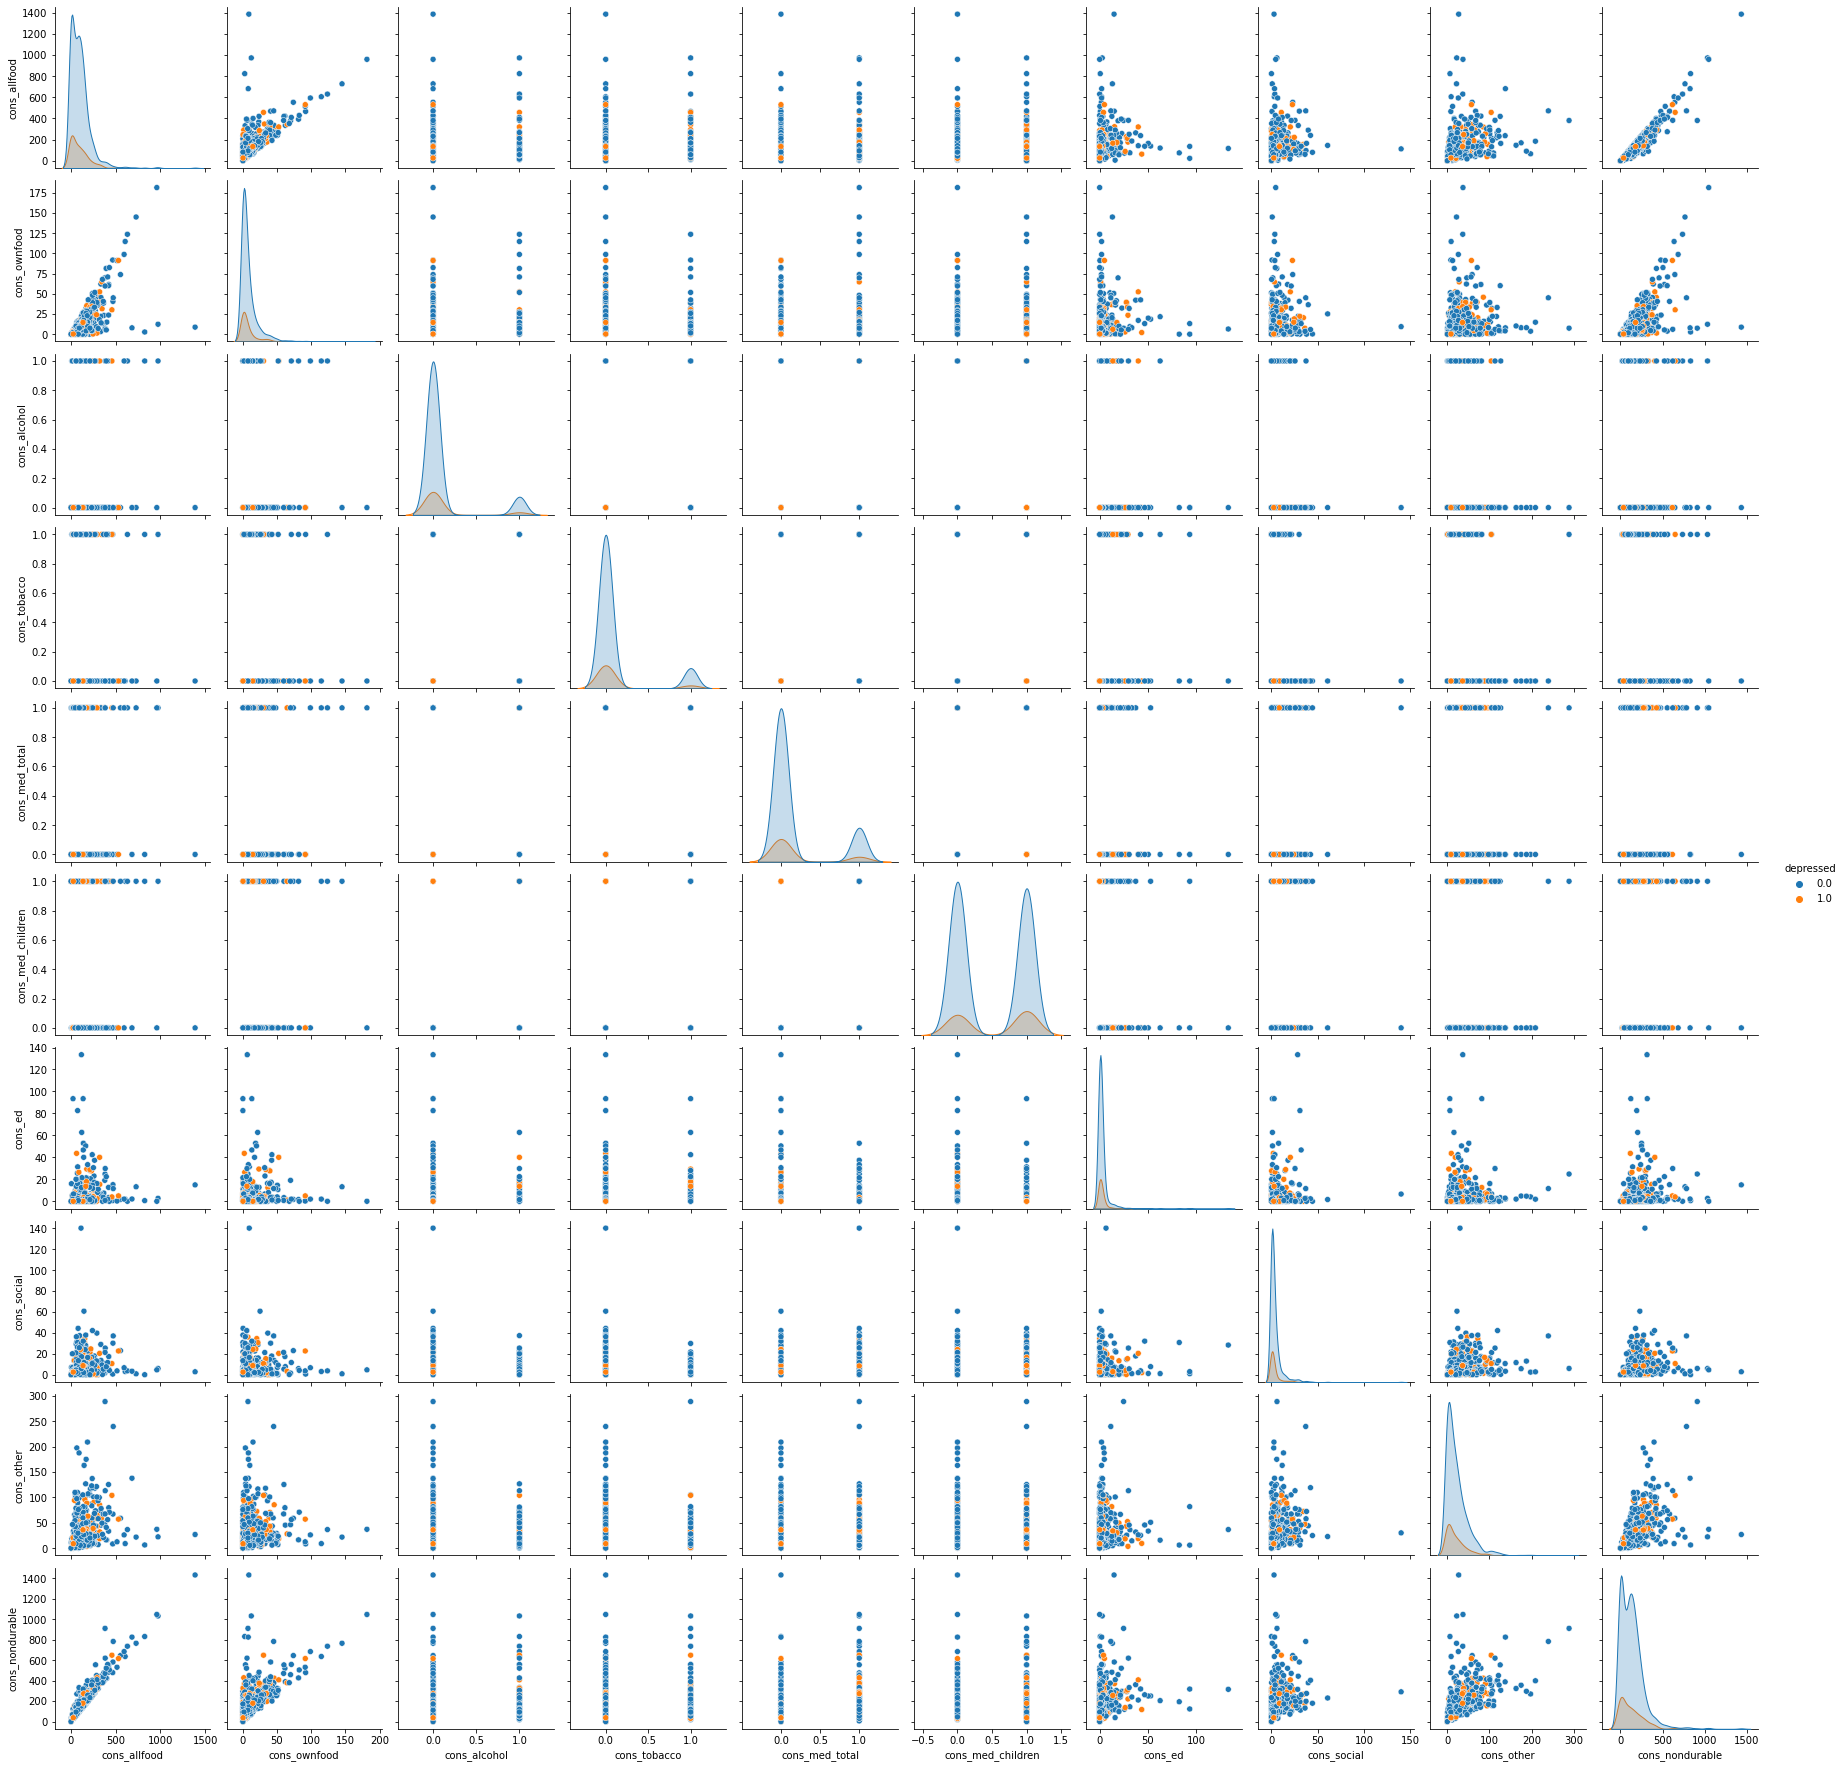

In [26]:
sns.pairplot(df, x_vars=cons,
            y_vars=cons,
            hue='depressed')

In [27]:
ent = ['ent_wagelabor', 'ent_ownfarm', 'ent_business', 'ent_nonagbusiness',
      'ent_employees', 'ent_nonag_revenue', 'ent_nonag_flowcost', 
      'ent_farmrevenue', 'ent_farmexpenses', 'ent_animalstockrev', 'ent_total_cost']

df_ent = df[ent]
df_ent.describe()

#categorical: ent_wagelabor, ent_ownfarm, ent_business, ent_nonagbusiness

#turn into categorical: ent_employees, ent_nonag_revenue, ent_nonag_flowcost, 



,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.186574,0.248474,0.107236,0.269398,0.032258,34.789796,17.281766,4.504611,1.870426,3.925841,21.386678
std,0.389739,0.432317,0.309548,0.443841,0.391674,257.521337,100.360724,8.614499,3.505068,12.180799,101.217837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.104687,0.488246,0.000000,1.240079
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.732168,2.166246,2.735959,10.218696
max,1.000000,1.000000,1.000000,1.000000,11.000000,7687.377400,2067.584200,161.354860,38.058746,176.169070,2067.584200


In [28]:
df['ent_employees']=np.where(df['ent_employees']!=0, True, False)
df['ent_nonag_revenue']=np.where(df['ent_nonag_revenue']!=0, True, False)
df['ent_nonag_flowcost']=np.where(df['ent_nonag_flowcost']!=0, True, False)

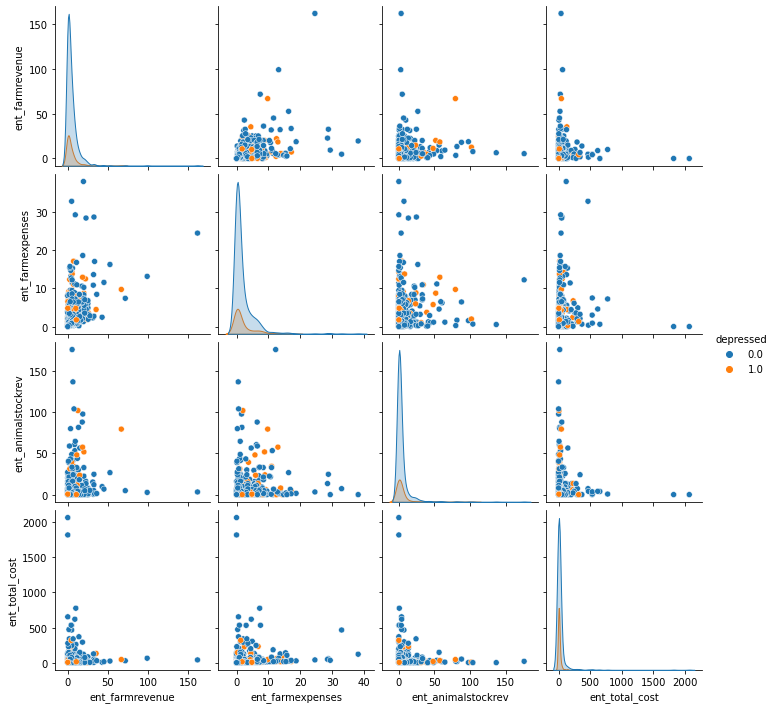

In [29]:
ent2 = ['ent_farmrevenue', 'ent_farmexpenses', 'ent_animalstockrev', 'ent_total_cost']

sns.pairplot(df, x_vars=ent2,
            y_vars=ent2,
            hue='depressed')

In [30]:
mpesa = ['given_mpesa', 'amount_given_mpesa', 'received_mpesa', 
         'amount_received_mpesa',
         'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa']

df_mpesa = df[mpesa]
df_mpesa.describe()

#drop amount_given_mpesa, amount_received_mpesa, amount_saved_mpesa
#(those columns only have values for a very few at the top)
#already cats: given_mpesa, received_mpesa, saved_mpesa

#net_mpesa has some negaive entries -- explore more 

,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.015693,0.551532,0.066260,3.552145,3.000613,0.190061,2.261253
std,0.124340,6.477887,0.248844,24.908206,25.796114,0.392520,19.642346
min,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780


In [31]:
df = df.drop(columns=['amount_given_mpesa', 'amount_received_mpesa', 
                      'amount_saved_mpesa'], axis=1)

In [32]:
df_mpesa['net_mpesa'].value_counts()

 0.000000      1046
 8.007685        15
 16.015369        9
 4.804611         6
 11.210759        6
-16.015369        5
 32.030739        5
 3.203074         4
 24.023054        4
 160.153700       4
 9.609222         3
 19.218445        3
 44.843037        3
-8.007685         3
-24.023054        2
 64.061478        2
-11.210759        2
-14.413833        2
 12.812296        2
 352.338130       2
 192.184430       2
-112.107590       1
 36.835350        1
 40.038425        1
 288.276670       1
-64.061478        1
 30.429203        1
 1.601537         1
 80.076851        1
-32.030739        1
-40.038425        1
 48.046108        1
-160.153700       1
 208.199810       1
 256.245910       1
 56.053795        1
 253.042850       1
 20.819981        1
Name: net_mpesa, dtype: int64

In [33]:
df['net_mpesa_cat'] = df['net_mpesa']
df['net_mpesa_cat'] = pd.cut(df.net_mpesa_cat, bins=[-200,-1,0,1000],labels=['neg', 'zero', 'positive'])

df['net_mpesa_cat'].value_counts()



zero        1046
positive      82
neg           19
Name: net_mpesa_cat, dtype: int64

[Text(0.5, 0, 'not depressed              depressed')]

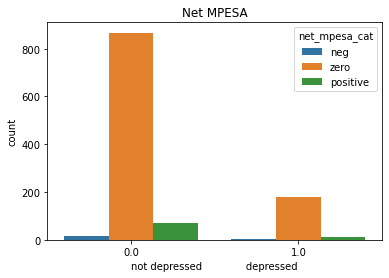

In [34]:
ax = sns.countplot(x='depressed', hue='net_mpesa_cat', data=df)
plt.title('Net MPESA')
ax.set(xlabel='not depressed              depressed')

In [35]:
df_nan = df[df.columns[df.isna().any()]]

In [36]:
df_nan.shape

(1147, 19)

In [37]:
df.describe()

,surveyid,village,femaleres,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,...,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,received_mpesa,net_mpesa,saved_mpesa,early_survey,depressed,day_of_week
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,813.000000,1147.000000,...,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,715.646905,76.370532,0.917175,0.771578,2.858762,4.866609,8.726242,2.020052,4.901599,128.657487,...,24.272014,288.386454,34.403187,0.015693,0.066260,3.000613,0.190061,0.098518,0.169137,3.292066
std,415.138437,66.796515,0.275737,0.419999,1.848805,2.124114,2.873123,2.017926,2.102698,140.145204,...,797.591196,384.847844,133.832666,0.124340,0.248844,25.796114,0.392520,0.298144,0.375036,1.683810
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000
25%,352.500000,23.000000,1.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,716.000000,57.000000,1.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,107.613750,...,0.000000,188.812960,4.631111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1077.000000,105.500000,1.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,189.290000,...,0.000000,399.124330,21.917145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,1431.609100,...,27000.000000,3782.325200,2275.472700,1.000000,1.000000,352.338130,1.000000,1.000000,1.000000,6.000000


In [38]:
#df_nan = df_nan.fillna(-1)
#df_nan.hist(figsize = (20,18));

df['med_portion_sickinjured'].value_counts()

1.000000    142
0.500000    105
0.000000     89
0.333333     62
0.666667     48
0.750000     47
0.400000     41
0.200000     40
0.250000     40
0.600000     28
0.800000     19
0.833333     18
0.428571     17
0.571429     15
0.166667     13
0.857143     11
0.285714     11
0.375000     11
0.714286     10
0.142857      8
0.222222      6
0.625000      5
0.444444      4
0.125000      4
0.555556      3
0.875000      3
0.111111      3
0.100000      2
0.300000      2
0.916667      1
0.583333      1
2.000000      1
0.181818      1
0.727273      1
0.888889      1
Name: med_portion_sickinjured, dtype: int64

In [39]:
df = df.drop(columns = ['early_survey', 'day_of_week'], axis=1)

In [40]:
categoricals = ['village', 'femaleres', 'married', 'asset_niceroof', 'ent_wagelabor',
        'ent_ownfarm', 'ent_business', 'ent_nonagbusiness', 'med_vacc_newborns',
        'med_child_check', 'labor_primary', 'given_mpesa', 'received_mpesa',
        'saved_mpesa', 'fs_enoughtom', 'fs_sleephun', 'cons_alcohol', 'cons_tobacco',
               'cons_med_total', 'cons_med_children', 'ent_employees',
               'ent_nonag_revenue', 'ent_nonag_flowcost', 'net_mpesa_cat']



In [41]:
df['med_vacc_newborns'].unique()
#dropping this column as it's all 1's? 
df = df.drop(columns=['med_vacc_newborns'], axis=1)

In [42]:
df['med_child_check'].describe()
#also all 1's

count    1147.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: med_child_check, dtype: float64

In [43]:
categoricals.remove('med_child_check')
categoricals.remove('med_vacc_newborns')

In [44]:
df = df.drop(columns=['med_child_check'], axis=1)

In [45]:
continuous = []
cols = list(df.columns)

for col in cols:
    if col not in categoricals:
        continuous.append(col)
    else:
        pass
continuous
        

['surveyid',
 'survey_date',
 'age',
 'children',
 'hhsize',
 'edu',
 'hh_children',
 'hh_totalmembers',
 'cons_nondurable',
 'asset_livestock',
 'asset_durable',
 'asset_phone',
 'asset_savings',
 'asset_land_owned_total',
 'cons_allfood',
 'cons_ownfood',
 'cons_ed',
 'cons_social',
 'cons_other',
 'ent_farmrevenue',
 'ent_farmexpenses',
 'ent_animalstockrev',
 'ent_total_cost',
 'fs_adskipm_often',
 'fs_adwholed_often',
 'fs_chskipm_often',
 'fs_chwholed_often',
 'fs_meat',
 'med_expenses_hh_ep',
 'med_expenses_sp_ep',
 'med_expenses_child_ep',
 'med_portion_sickinjured',
 'med_port_sick_child',
 'med_afford_port',
 'med_sickdays_hhave',
 'med_healthconsult',
 'ed_expenses',
 'ed_expenses_perkid',
 'ed_schoolattend',
 'ed_sch_missedpc',
 'ed_work_act_pc',
 'wage_expenditures',
 'durable_investment',
 'nondurable_investment',
 'net_mpesa',
 'depressed']

In [46]:
continuous.remove('depressed')
continuous.remove('surveyid')
continuous.remove('survey_date')

In [47]:
df = df.drop(columns=['surveyid', 'survey_date'], axis=1)

In [48]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 3
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1147 non-null   object 
 1   children                 1147 non-null   int64  
 2   hhsize                   1147 non-null   int64  
 3   edu                      1147 non-null   int64  
 4   hh_children              1147 non-null   int64  
 5   hh_totalmembers          813 non-null    float64
 6   cons_nondurable          1147 non-null   float64
 7   asset_livestock          1147 non-null   float64
 8   asset_durable            1147 non-null   float64
 9   asset_phone              1147 non-null   float64
 10  asset_savings            1147 non-null   float64
 11  asset_land_owned_total   1147 non-null   float64
 12  cons_allfood             1147 non-null   float64
 13  cons_ownfood             1147 non-null   float64
 14  cons_ed                  11

In [49]:
#add column regarding being a parent
df['isparent'] = np.where(df['children']!= 0, True, False)

In [50]:
categoricals.append('isparent')

C:\Users\kas2n\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


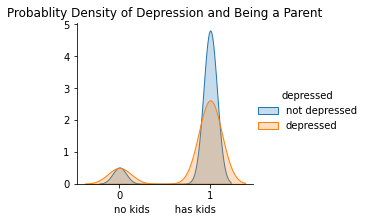

In [51]:
facet = sns.FacetGrid(df,hue="depressed")
facet.map(sns.kdeplot, 'isparent', shade=True)
facet.set(xticks=[0, 1])
facet.set(xlabel='no kids        has kids')
facet.set(title='Probablity Density of Depression and Being a Parent')
facet.add_legend(labels=['not depressed', 'depressed'])


In [52]:
assets = ['asset_livestock', 'asset_durable', 'asset_phone', 'asset_savings',
         'asset_land_owned_total', 'asset_niceroof']
asset_df = df[assets]
asset_df.describe()

#change asset_land_owned_total into categorical? same for asset_savings
#asset_phone

,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,113.844926,148.378940,19.671985,10.229493,0.929520,0.000872
std,239.454852,198.155611,28.043201,79.670879,1.662692,0.029527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.521257,121.396510,0.000000,0.000000,0.000000,0.000000
75%,103.257870,221.652725,32.030739,0.000000,1.500000,0.000000
max,2754.531700,3720.370400,192.184430,2242.151900,27.000000,1.000000


In [53]:
df['asset_phone'] = np.where(df['asset_phone']!= 0, True, False)
df['asset_savings'] = np.where(df['asset_savings']!=0, True, False)
df['asset_land_owned_total'] = np.where(df['asset_land_owned_total']!=0, True, False)

categoricals.append('asset_phone')
categoricals.append('asset_savings')
categoricals.append('asset_land_owned_total')
continuous.remove('asset_phone')
continuous.remove('asset_savings')
continuous.remove('asset_land_owned_total')

In [54]:
#add column for if someone has any asset? 
asset_df = df[assets]
results = asset_df.any(axis='columns')
resultsall = asset_df.all(axis='columns') #none
results.value_counts()

df['has_any_assets']=results
categoricals.append('has_any_assets')

In [55]:
assets.append('has_any_assets')

C:\Users\kas2n\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


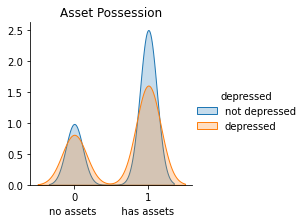

In [56]:
facet = sns.FacetGrid(df,hue="depressed")
facet.map(sns.kdeplot, 'has_any_assets', shade=True)
facet.set(xticks=[0, 1])
plt.title('Asset Possession')
facet.set(xlabel='no assets        has assets')
facet.add_legend(labels=['not depressed', 'depressed'])


In [57]:
df_ent.describe()

,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.186574,0.248474,0.107236,0.269398,0.032258,34.789796,17.281766,4.504611,1.870426,3.925841,21.386678
std,0.389739,0.432317,0.309548,0.443841,0.391674,257.521337,100.360724,8.614499,3.505068,12.180799,101.217837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.104687,0.488246,0.000000,1.240079
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.732168,2.166246,2.735959,10.218696
max,1.000000,1.000000,1.000000,1.000000,11.000000,7687.377400,2067.584200,161.354860,38.058746,176.169070,2067.584200


In [58]:
df_cons.describe()

,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,cons_nondurable
count,1147.000000,1147.000000,1103.000000,1127.000000,1147.000000,727.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,95.951699,8.305256,1.174514,0.632551,2.681046,1.822095,2.787015,3.652535,21.829243,128.657487
std,114.427881,15.126559,6.731644,2.741528,12.120835,10.901540,8.318368,7.568075,28.552299,140.145204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.759575,3.203074,0.000000,0.000000,0.000000,0.000000,0.467115,1.302583,13.853295,107.613750
75%,136.916635,9.715991,0.000000,0.000000,0.000000,0.000000,2.402306,3.843689,30.989741,189.290000
max,1386.966300,181.574260,104.671880,41.868752,206.598270,206.598270,133.461410,140.134490,289.093440,1431.609100


In [59]:
df['age'].unique()

array([28.0, 23.0, 22.0, 27.0, 59.0, 35.0, 34.0, 21.0, 32.0, 29.0, 84.0,
       38.0, 27.5, 56.0, 24.0, 25.0, 44.0, 26.0, 40.0, 55.0, 43.0, 51.0,
       53.0, 36.0, 19.0, 31.0, 41.0, 20.0, 18.0, 37.0, 33.0, 49.0,
       48.099998, 21.299999, 42.0, 46.0, 30.0, 45.0, 48.0, 28.200001,
       52.0, 39.0, 17.0, 57.0, 63.0, 62.0, 60.0, 69.0, 75.0, 74.0,
       34.400002, 37.700001, 85.0, 47.0, 66.0, 76.0, 72.0, 23.799999,
       65.0, 64.0, 54.0, 27.9, 70.0, 73.0, 75.900002, 81.0, 21.700001,
       85.699997, 68.0, 91.0, 80.0, 58.0, 67.0, 24.9, 32.5, 78.0, 31.9,
       61.0, 19.4, 25.9, 32.799999, 65.900002, 30.9, 87.0, 30.200001,
       21.6, 23.9, 50.0, 71.0, 28.4, 40.900002, 48.299999, 44.5,
       29.200001, 18.6, 27.6, 82.0, 54.5, 29.299999, '21', '44', '23',
       '67'], dtype=object)

In [60]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.replace(np.nan, -1, regex=True)

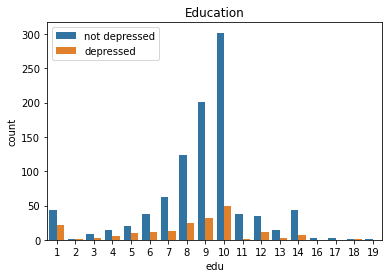

In [61]:
ax = sns.countplot(x='edu', hue='depressed', data=df)
plt.title('Education')
plt.legend(['not depressed', 'depressed'])

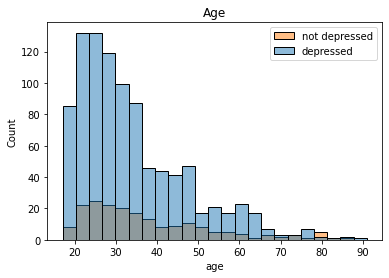

In [62]:
sns.histplot(x='age',  hue='depressed', stat='count', data=df)
plt.title('Age')
plt.legend(['not depressed', 'depressed'])

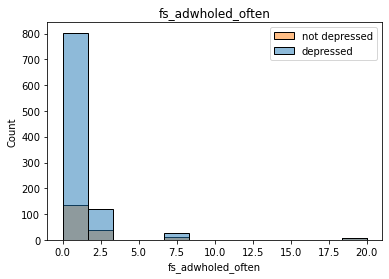

In [63]:
sns.histplot(x='fs_adwholed_often',  hue='depressed', stat='count', data=df)
plt.title('fs_adwholed_often')
plt.legend(['not depressed', 'depressed'])


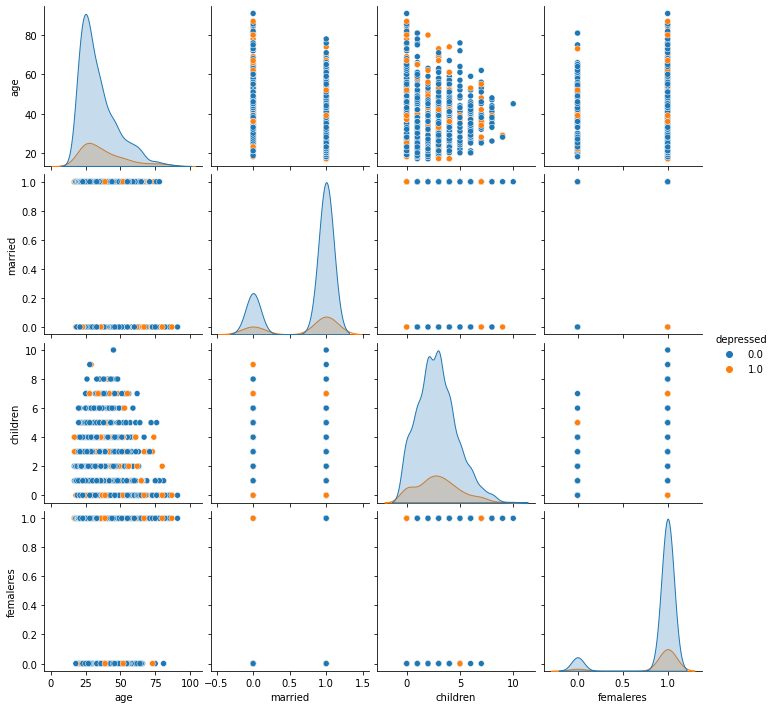

In [64]:
sns.pairplot(df, x_vars=['age', 'married', 'children', 'femaleres'], 
            y_vars=['age', 'married', 'children', 'femaleres'],
            hue='depressed')

In [65]:
columns = list(df.columns)

In [66]:
corr = df[columns].corr()
corr

,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,...,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,received_mpesa,net_mpesa,saved_mpesa,depressed,isparent,has_any_assets
village,1.000000,-0.008566,-0.000584,0.020780,0.040601,0.034955,-0.006205,-0.039921,-0.062405,-0.029448,...,-0.016294,-0.061427,-0.018706,0.027351,-0.039276,0.006771,0.064274,0.014286,0.012896,-0.090401
femaleres,-0.008566,1.000000,-0.136329,0.273512,0.223518,0.255252,-0.076008,0.197450,0.194379,0.075544,...,0.009149,0.109634,0.044285,0.012493,-0.034404,-0.037725,0.008512,-0.007864,0.263890,0.106783
age,-0.000584,-0.136329,1.000000,-0.400098,-0.112237,-0.069977,-0.396506,-0.071032,-0.036226,-0.030918,...,0.005217,-0.009947,-0.015761,-0.026785,0.045793,0.022516,-0.099768,0.104587,-0.397394,-0.016144
married,0.020780,0.273512,-0.400098,1.000000,0.221377,0.324784,0.199058,0.153669,0.176473,0.150273,...,0.016565,0.132006,-0.012582,0.051993,-0.022041,-0.003369,0.067730,-0.081358,0.294675,0.048943
children,0.040601,0.223518,-0.112237,0.221377,1.000000,0.934887,0.163560,0.636952,0.427772,0.088551,...,0.066734,0.072505,0.038588,0.036222,0.014669,-0.001860,0.033416,0.009313,0.536141,-0.007449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
net_mpesa,0.006771,-0.037725,0.022516,-0.003369,-0.001860,0.004965,0.021218,0.037798,0.052554,-0.001788,...,-0.003543,0.031134,-0.007286,-0.112727,0.470377,1.000000,0.057217,0.004987,0.010580,0.061477
saved_mpesa,0.064274,0.008512,-0.099768,0.067730,0.033416,0.033574,0.080995,0.017217,0.020121,-0.011256,...,-0.014748,0.046934,0.029766,0.028229,0.076430,0.057217,1.000000,-0.017023,0.038619,0.017023
depressed,0.014286,-0.007864,0.104587,-0.081358,0.009313,0.002057,-0.126243,0.004739,-0.007616,-0.023046,...,-0.013736,-0.017431,-0.035401,-0.019545,-0.007989,0.004987,-0.017023,1.000000,-0.076639,-0.043555
isparent,0.012896,0.263890,-0.397394,0.294675,0.536141,0.510400,0.269155,0.347096,0.246064,0.092336,...,0.010552,0.058626,0.047432,0.021090,0.013027,0.010580,0.038619,-0.076639,1.000000,0.025944


In [67]:
abs(corr) > 0.75

,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,...,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,received_mpesa,net_mpesa,saved_mpesa,depressed,isparent,has_any_assets
village,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
femaleres,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
married,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
children,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
net_mpesa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
saved_mpesa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
depressed,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
isparent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [68]:
dfcor = df[columns].corr().abs().stack().reset_index().sort_values(0, ascending=False)

dfcor['pairs'] = list(zip(dfcor.level_0, dfcor.level_1))
dfcor.set_index(['pairs'], inplace = True)

dfcor.drop(columns=['level_1', 'level_0'], inplace=True)

dfcor.columns = ['cc']

dfcor.drop_duplicates(inplace=True)

In [69]:
dfcor[(dfcor.cc>.75) & (dfcor.cc <1)]

,cc
pairs,
"(cons_allfood, cons_nondurable)",0.966451
"(med_healthconsult, med_afford_port)",0.940353
"(hhsize, children)",0.934887
"(ed_expenses, cons_ed)",0.934064
"(hh_children, hh_totalmembers)",0.933398
"(med_portion_sickinjured, has_any_assets)",0.931096
"(labor_primary, ent_wagelabor)",0.895733
"(ent_nonag_revenue, ent_nonagbusiness)",0.864946
"(med_portion_sickinjured, med_afford_port)",0.853270


In [70]:
highlycorrelated = ['cons_allfood', 'med_afford_port', 'hhsize', 'cons_ed', 'hh_children', 'med_portion_sickinjured',
                    'ent_wagelabor', 'ent_nonagbusiness', 'ent_nonag_flowcost', 'fs_enoughtom', 'fs_sleephun',
                    'hh_totalmembers', 'ed_expenses', 'asset_livestock', 'ent_total_cost', 'med_healthconsult', 
                    'med_port_sick_child', 'durable_investment']
df = df.drop(columns = highlycorrelated, axis=1)


In [71]:
columns = list(df.columns)
corr2 = df[columns].corr()
corr2['depressed'].sort_values(ascending=False)

depressed                 1.000000
fs_adwholed_often         0.145022
age                       0.104587
med_expenses_sp_ep        0.072005
fs_chwholed_often         0.049979
med_expenses_hh_ep        0.044635
cons_med_children         0.039178
asset_savings             0.038247
ed_expenses_perkid        0.036211
med_sickdays_hhave        0.022551
fs_adskipm_often          0.019245
ent_animalstockrev        0.018989
fs_chskipm_often          0.018377
ent_farmexpenses          0.017925
village                   0.014286
children                  0.009313
asset_land_owned_total    0.007475
net_mpesa                 0.004987
med_expenses_child_ep     0.003849
labor_primary            -0.000727
cons_med_total           -0.001089
ed_sch_missedpc          -0.002032
cons_alcohol             -0.003525
cons_tobacco             -0.003597
femaleres                -0.007864
received_mpesa           -0.007989
ent_employees            -0.010994
ent_ownfarm              -0.011862
ed_schoolattend     

In [72]:
lowcorr = ['children', 'asset_land_owned_total', 'net_mpesa', 
           'med_expenses_child_ep', 'labor_primary', 'cons_med_total',
           'ed_sch_missedpc', 'cons_alcohol', 'cons_tobacco', 'femaleres',
           'received_mpesa']
highlycorrelated.extend(lowcorr)

In [73]:
highlycorrelated

['cons_allfood',
 'med_afford_port',
 'hhsize',
 'cons_ed',
 'hh_children',
 'med_portion_sickinjured',
 'ent_wagelabor',
 'ent_nonagbusiness',
 'ent_nonag_flowcost',
 'fs_enoughtom',
 'fs_sleephun',
 'hh_totalmembers',
 'ed_expenses',
 'asset_livestock',
 'ent_total_cost',
 'med_healthconsult',
 'med_port_sick_child',
 'durable_investment',
 'children',
 'asset_land_owned_total',
 'net_mpesa',
 'med_expenses_child_ep',
 'labor_primary',
 'cons_med_total',
 'ed_sch_missedpc',
 'cons_alcohol',
 'cons_tobacco',
 'femaleres',
 'received_mpesa']

In [74]:
df = df.drop(columns=lowcorr, axis=1)

In [75]:
continuous

['age',
 'children',
 'hhsize',
 'edu',
 'hh_children',
 'hh_totalmembers',
 'cons_nondurable',
 'asset_livestock',
 'asset_durable',
 'cons_allfood',
 'cons_ownfood',
 'cons_ed',
 'cons_social',
 'cons_other',
 'ent_farmrevenue',
 'ent_farmexpenses',
 'ent_animalstockrev',
 'ent_total_cost',
 'fs_adskipm_often',
 'fs_adwholed_often',
 'fs_chskipm_often',
 'fs_chwholed_often',
 'fs_meat',
 'med_expenses_hh_ep',
 'med_expenses_sp_ep',
 'med_expenses_child_ep',
 'med_portion_sickinjured',
 'med_port_sick_child',
 'med_afford_port',
 'med_sickdays_hhave',
 'med_healthconsult',
 'ed_expenses',
 'ed_expenses_perkid',
 'ed_schoolattend',
 'ed_sch_missedpc',
 'ed_work_act_pc',
 'wage_expenditures',
 'durable_investment',
 'nondurable_investment',
 'net_mpesa']

C:\Users\kas2n\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kas2n\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


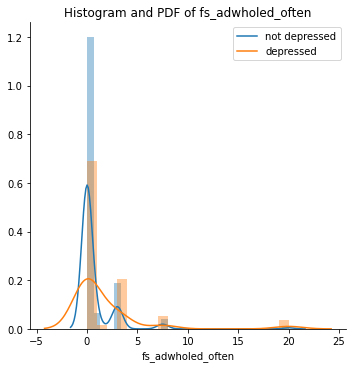

In [76]:
sns.FacetGrid(df, hue="depressed", height=5) \
  .map(sns.distplot, "fs_adwholed_often") \
  
plt.title('Histogram and PDF of fs_adwholed_often')
plt.legend(['not depressed', 'depressed'])
plt.show();

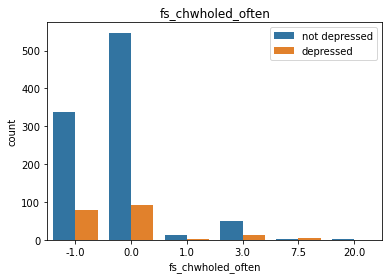

In [77]:
sns.countplot(data = df, x='fs_chwholed_often', hue='depressed')  
plt.title('fs_chwholed_often')
plt.legend(['not depressed', 'depressed'])

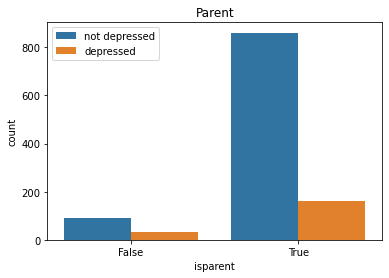

In [78]:
sns.countplot(data = df, x='isparent', hue='depressed')
plt.title('Parent')
plt.legend(['not depressed', 'depressed'])

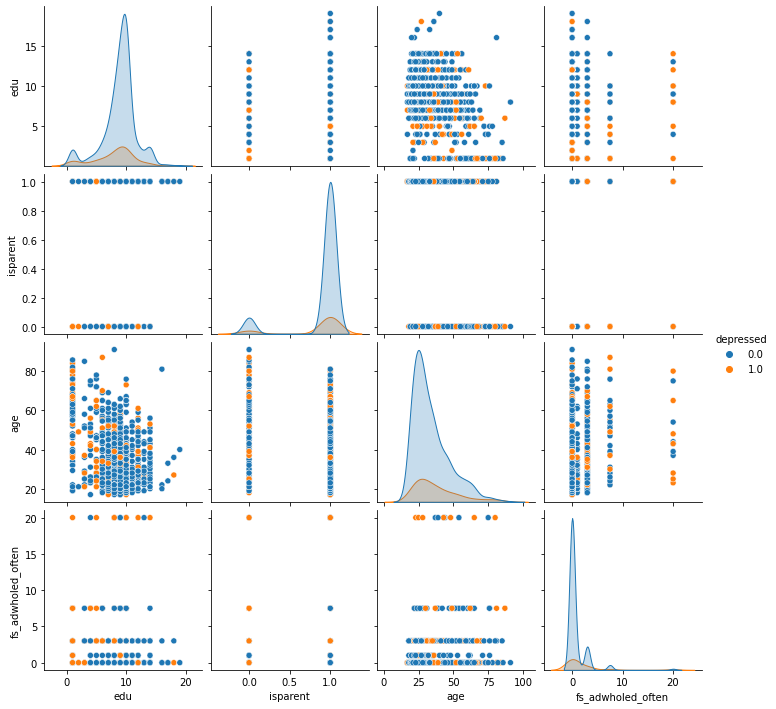

In [79]:
sns.pairplot(df, x_vars=['edu', 'isparent', 'age', 'fs_adwholed_often'],
            y_vars=['edu', 'isparent', 'age', 'fs_adwholed_often'],
            hue='depressed')

In [80]:
for item in highlycorrelated:
    #print(item)
    if item in continuous:
        continuous.remove(item)
    if item in categoricals:
        categoricals.remove(item)


In [81]:
df.isna().sum()

village                  0
age                      0
married                  0
edu                      0
cons_nondurable          0
asset_durable            0
asset_phone              0
asset_savings            0
asset_niceroof           0
cons_ownfood             0
cons_med_children        0
cons_social              0
cons_other               0
ent_ownfarm              0
ent_business             0
ent_employees            0
ent_nonag_revenue        0
ent_farmrevenue          0
ent_farmexpenses         0
ent_animalstockrev       0
fs_adskipm_often         0
fs_adwholed_often        0
fs_chskipm_often         0
fs_chwholed_often        0
fs_meat                  0
med_expenses_hh_ep       0
med_expenses_sp_ep       0
med_sickdays_hhave       0
ed_expenses_perkid       0
ed_schoolattend          0
ed_work_act_pc           0
wage_expenditures        0
nondurable_investment    0
given_mpesa              0
saved_mpesa              0
depressed                0
net_mpesa_cat            0
i

In [82]:
for col in categoricals: 
    df[col] = df[col].astype(str)

In [83]:
#Create features and labels
X = df.drop('depressed', axis=1)
y = df['depressed']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 10)

In [85]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat_processed = ohe.fit_transform(X_train[categoricals])
X_test_cat_processed = ohe.transform(X_test[categoricals])

scaler = StandardScaler()

X_train_num_processed = scaler.fit_transform(X_train[continuous])
X_test_num_processed = scaler.transform(X_test[continuous])

X_train_processed_df = pd.DataFrame(np.concatenate([X_train_num_processed, 
                                                   X_train_cat_processed],
                                                  axis = 1), 
                                    columns=continuous+ohe.get_feature_names(categoricals).tolist())
X_test_processed_df = pd.DataFrame(np.concatenate([X_test_num_processed, 
                                                  X_test_cat_processed], 
                                                  axis=1),
                                  columns=continuous+ohe.get_feature_names(categoricals).tolist())

X_train_processed_df.shape, X_test_processed_df.shape

((860, 273), (287, 273))

In [86]:

def get_metrics(clf, X, y):
    y_pred = clf.predict(X)
    
    my_metrics = (
        (accuracy_score, 'accuracy_score'),
        (recall_score, 'recall_score'),
        (precision_score, 'precision_score'),
        (f1_score, 'f1_score')
    )
    #precision score: ratio of correctly predicted positive observation to 
    #the total predicted positive observations - (high precision = low false positive)
    
    #recall - ration of correctly predicted positive observations to all observations
    # of all that are depressed, how many did we label? 
    
    #F1 score: weighted average of precision and recall 
    
   # for f, name in my_metrics:
    #    print(name.title())
     #   print(f(y, y_pred))
      #  print()
        
    plot_confusion_matrix(clf, X, y, cmap='Reds')
    plt.grid(False)
    plt.show()

In [87]:
def test_results(clf, X_train, X_test, y_train, y_test):
    training_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    training_acc = accuracy_score(y_train, training_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    training_recall = recall_score(y_train, training_preds)
    test_recall = recall_score(y_test, test_preds)
    training_prec = precision_score(y_train, training_preds)
    test_prec = precision_score(y_test, test_preds)
    train_f1 = f1_score(y_train, training_preds)
    test_f1 = f1_score(y_test, test_preds)
    
    
    print('Training Accuracy: {:.4}%'.format(training_acc * 100))
    print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
    print('Difference: {:.4}%'.format((training_acc - test_accuracy) * 100))
    print()
    print('Training Recall: {:.4}%'.format(training_recall * 100))
    print('Validation Recall: {:.4}%'.format(test_recall * 100))
    print('Difference: {:.4}%'.format((training_recall - test_recall) * 100))
    print()
    print('Training Precision: {:.4}%'.format(training_prec * 100))
    print('Validation Precision: {:.4}%'.format(test_prec * 100))
    print('Difference: {:.4}%'.format((training_prec - test_prec) * 100))
    print()
    print('Training F1: {:.4}%'.format(train_f1 * 100))
    print('Validation F1: {:.4}%'.format(test_f1 * 100))
    print('Difference: {:.4}%'.format((train_f1 - test_f1) * 100))
    get_metrics(clf, X_train, y_train)


## Models

### KNN model

First I attempt a KNN model. However, it has very low recall and F1 scores. I check multiple K values but am unable to find one that allows the model to perform well. 

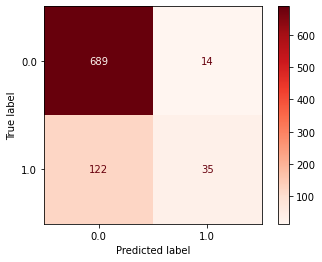

Training Accuracy: 84.19%
Validation accuracy: 82.93%
Difference: 1.259%

Training Recall: 22.29%
Validation Recall: 5.405%
Difference: 16.89%

Training Precision: 71.43%
Validation Precision: 12.5%
Difference: 58.93%

Training F1: 33.98%
Validation F1: 7.547%
Difference: 26.43%


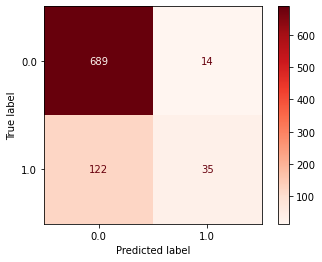

In [88]:
#KNN model 

knn = KNeighborsClassifier()
knn.fit(X_train_processed_df, y_train)


get_metrics(knn, X_train_processed_df, y_train)
test_results(knn, X_train_processed_df, X_test_processed_df, y_train, y_test)

In [89]:
# Try out different values of K. p=2.
k_vals_lst = [1, 3, 5, 7, 9]

all_metrics = []
for k in k_vals_lst:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_processed_df, y_train)
    
    y_pred_test = knn.predict(X_test_processed_df)
    
    acc = accuracy_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    all_metrics.append([acc, recall, prec, f1])

In [90]:
model_df_p2 = pd.DataFrame(
    np.array(all_metrics), 
    columns=['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    index=k_vals_lst
)
model_df_p2

,Accuracy,Recall,Precision,F1-Score
1,0.759582,0.270270,0.192308,0.224719
3,0.825784,0.108108,0.190476,0.137931
5,0.829268,0.054054,0.125000,0.075472
7,0.839721,0.000000,0.000000,0.000000
9,0.846690,0.000000,0.000000,0.000000


### Random Forest Classifier

I create a Random Forest Classifier and hypertune the values of max depth, min samples split, and min samples leaf. However, this model doesn't work at all. Despite the grid search being told to prioritize recall scores, the model has a 0% recall. 

In [91]:
#Second pipeline 
rf2 = RandomForestClassifier()
rf2.fit(X_train_processed_df, y_train)

RandomForestClassifier()

In [92]:
grid = [{'max_depth': [4, 5, 6],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [1, 4, 9]}]

In [93]:
gridsearch = GridSearchCV(estimator=rf2,
                         param_grid=grid,
                         scoring=['f1', 'recall'], 
                         refit='recall',
                         cv=5)

In [94]:
gridsearch.fit(X_train_processed_df, y_train)
gridsearch.score(X_test_processed_df, y_test)
gridsearch.best_estimator_, gridsearch.best_params_, gridsearch.best_score_

(RandomForestClassifier(max_depth=6, min_samples_split=10),
 {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10},
 0.0064516129032258064)

C:\Users\kas2n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy: 81.86%
Validation accuracy: 87.11%
Difference: -5.248%

Training Recall: 0.6369%
Validation Recall: 0.0%
Difference: 0.6369%

Training Precision: 100.0%
Validation Precision: 0.0%
Difference: 100.0%

Training F1: 1.266%
Validation F1: 0.0%
Difference: 1.266%


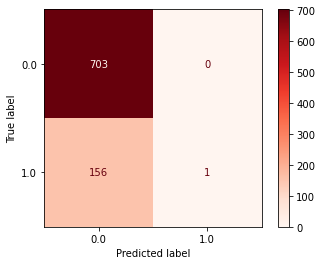

In [95]:
rf3 = gridsearch.best_estimator_
rf3.fit(X_train_processed_df, y_train)
test_results(rf3, X_train_processed_df, X_test_processed_df, y_train, y_test)


### Decision Tree Model

The decision tree model also goes from a low recall score to not predicting depression at all. I perform a grid search to hypertune the values of max depth and min samples split to help improve overfitting and recall scores.  However, the validation recall score is 18.92% and the difference between training and validation recall scores is 26.94%. I then hypertune the min samples leaf paramater, and the recall score goes to 0%. This model also doesn't work. 

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
grid3 = [{'max_depth': [2, 6, 10], 
         'min_samples_split': [5, 10]}]

gridsearch3 = GridSearchCV(estimator=tree,
                          param_grid=grid3,
                          scoring=['f1', 'recall'],
                          refit='recall',
                          cv=5)
gridsearch3.fit(X_train_processed_df, y_train)
gridsearch3.score(X_test_processed_df, y_test)
gridsearch3.best_estimator_, gridsearch3.best_params_, gridsearch3.best_score_

(DecisionTreeClassifier(max_depth=10, min_samples_split=5),
 {'max_depth': 10, 'min_samples_split': 5},
 0.14657258064516127)

Training Accuracy: 89.65%
Validation accuracy: 82.58%
Difference: 7.073%

Training Recall: 45.86%
Validation Recall: 13.51%
Difference: 32.35%

Training Precision: 94.74%
Validation Precision: 21.74%
Difference: 73.0%

Training F1: 61.8%
Validation F1: 16.67%
Difference: 45.14%


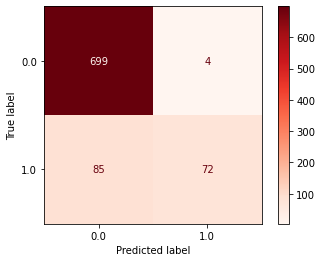

In [97]:
tree = gridsearch3.best_estimator_
tree.fit(X_train_processed_df, y_train)
test_results(tree, X_train_processed_df, X_test_processed_df, y_train, y_test)

In [98]:


grid3 = [{'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5]}]

gridsearch3 = GridSearchCV(estimator=DecisionTreeClassifier(),
                          param_grid=grid3,
                          scoring=['recall'], 
                          refit='recall',
                          cv=5)
gridsearch3.fit(X_train_processed_df, y_train)
gridsearch3.score(X_test_processed_df, y_test)
gridsearch3.best_estimator_, gridsearch3.best_params_, gridsearch3.best_score_

(DecisionTreeClassifier(min_samples_leaf=0.1), {'min_samples_leaf': 0.1}, 0.0)

Training Accuracy: 81.74%
Validation accuracy: 87.11%
Difference: -5.364%

Training Recall: 0.0%
Validation Recall: 0.0%
Difference: 0.0%

Training Precision: 0.0%
Validation Precision: 0.0%
Difference: 0.0%

Training F1: 0.0%
Validation F1: 0.0%
Difference: 0.0%


C:\Users\kas2n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


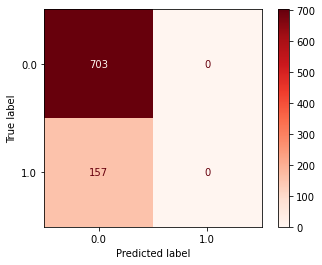

In [99]:
tree = gridsearch3.best_estimator_
tree.fit(X_train_processed_df, y_train)
test_results(tree, X_train_processed_df, X_test_processed_df, y_train, y_test)


### XGBoost Model

At first XGBoost Model seemed promising, but it overfits the data. I perform several gridsearches to help with the overfitting, including looking at max depth, min child weight, gamma, subsample, colsample by tree, and learning rate. The model continues to overfit the data, but unlike previous attempts, at least the recall score never becomes 0. 

C:\Users\kas2n\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 97.79%
Validation accuracy: 82.93%
Difference: 14.86%

Training Recall: 88.54%
Validation Recall: 5.405%
Difference: 83.13%

Training Precision: 99.29%
Validation Precision: 12.5%
Difference: 86.79%

Training F1: 93.6%
Validation F1: 7.547%
Difference: 86.06%


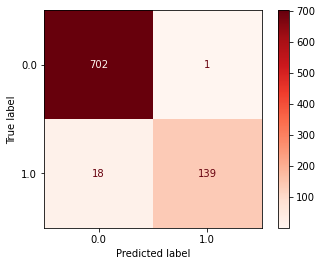

In [100]:
#XGBoost model 
from xgboost import XGBClassifier

clf = XGBClassifier()

clf.fit(X_train_processed_df, y_train)

test_results(clf, X_train_processed_df, X_test_processed_df, y_train, y_test)



[23:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 97.79%
Validation accuracy: 84.67%
Difference: 13.12%

Training Recall: 87.9%
Validation Recall: 8.108%
Difference: 79.79%

Training Precision: 100.0%
Validation Precision: 23.08%
Difference: 76.92%

Training F1: 93.56%
Validation F1: 12.0%
Difference: 81.56%


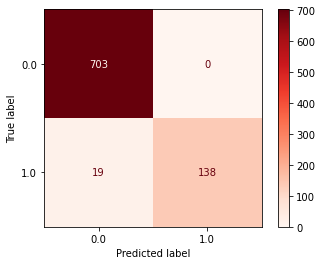

In [101]:
#xgboost model 2 trying to help overfitting 

clf2 = XGBClassifier(max_delta_step=1)

clf2.fit(X_train_processed_df, y_train)

test_results(clf2, X_train_processed_df, X_test_processed_df, y_train, y_test)


[23:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 95.47%
Validation accuracy: 85.02%
Difference: 10.45%

Training Recall: 75.8%
Validation Recall: 5.405%
Difference: 70.39%

Training Precision: 99.17%
Validation Precision: 20.0%
Difference: 79.17%

Training F1: 85.92%
Validation F1: 8.511%
Difference: 77.41%


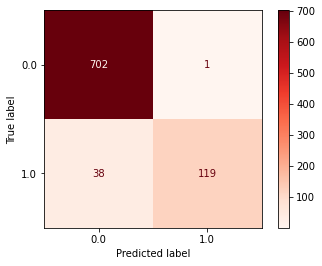

In [102]:
clf3 = XGBClassifier(learning_rate=0.1, max_depth=5, 
                    min_child_weight=1, gamma=0, subsample=0.8)
clf3.fit(X_train_processed_df, y_train)

test_results(clf3, X_train_processed_df, X_test_processed_df, y_train, y_test)


In [103]:
param_test1 = {'max_depth': [3, 4, 5, 6, 8],
              'min_child_weight': [1, 4, 5, 6, 10]}
gsearch1 = GridSearchCV(estimator=clf3, param_grid = param_test1, 
                        scoring=['f1', 'recall'], refit='recall', cv=5)
gsearch1.fit(X_train_processed_df, y_train)
gsearch1.best_estimator_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\kas2n\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=8,
               min_child_weight=4, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None),
 {'max_depth': 8, 'min_child_weight': 4},
 0.10826612903225807)

[23:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 94.3%
Validation accuracy: 82.93%
Difference: 11.38%

Training Recall: 70.7%
Validation Recall: 8.108%
Difference: 62.59%

Training Precision: 97.37%
Validation Precision: 16.67%
Difference: 80.7%

Training F1: 81.92%
Validation F1: 10.91%
Difference: 71.01%


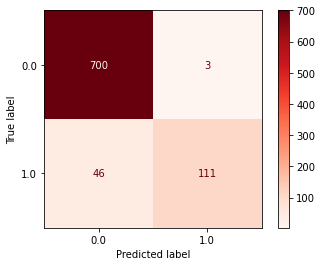

In [104]:
#'max_depth': 8, 'min_child_weight': 4

clf4 = gsearch1.best_estimator_
clf4.fit(X_train_processed_df, y_train)

test_results(clf4, X_train_processed_df, X_test_processed_df, y_train, y_test)


In [105]:
param_test2 = {'gamma': [0, 0.5, 1, 1.25, 1.5, 1.75, 2, 5]}
gsearch2 = GridSearchCV(estimator=clf4, param_grid = param_test2, 
                        scoring=['f1', 'recall'], refit='recall', cv=5)
gsearch2.fit(X_train_processed_df, y_train)
gsearch2.best_estimator_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\kas2n\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=8,
               min_child_weight=4, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None),
 {'gamma': 0},
 0.10826612903225807)

[23:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 94.3%
Validation accuracy: 82.93%
Difference: 11.38%

Training Recall: 70.7%
Validation Recall: 8.108%
Difference: 62.59%

Training Precision: 97.37%
Validation Precision: 16.67%
Difference: 80.7%

Training F1: 81.92%
Validation F1: 10.91%
Difference: 71.01%


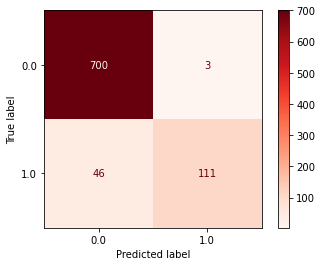

In [106]:
clf5 = gsearch2.best_estimator_
clf5.fit(X_train_processed_df, y_train)

test_results(clf5, X_train_processed_df, X_test_processed_df, y_train, y_test)


In [107]:
param_test3 = {'subsample': [0.6, 0.8, 0.9, 1.0], 
              'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}
gsearch3 = GridSearchCV(estimator=clf5, param_grid = param_test3, 
                        scoring=['f1', 'recall'], refit='recall', cv=5)
gsearch3.fit(X_train_processed_df, y_train)
gsearch3.best_estimator_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\kas2n\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=8,
               min_child_weight=4, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None),
 {'colsample_bytree': 0.5, 'subsample': 0.6},
 0.12056451612903227)

[23:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 90.93%
Validation accuracy: 85.71%
Difference: 5.216%

Training Recall: 54.14%
Validation Recall: 8.108%
Difference: 46.03%

Training Precision: 93.41%
Validation Precision: 30.0%
Difference: 63.41%

Training F1: 68.55%
Validation F1: 12.77%
Difference: 55.78%


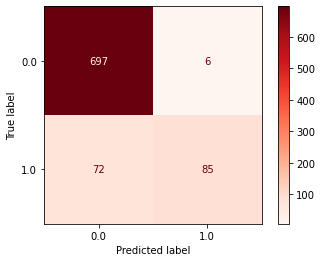

In [108]:
clf6 = gsearch3.best_estimator_
clf6.fit(X_train_processed_df, y_train)
test_results(clf6, X_train_processed_df, X_test_processed_df, y_train, y_test)


In [109]:
param_test4 = {'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}
gsearch4 = GridSearchCV(estimator=clf6, param_grid = param_test4, 
                        scoring=['f1', 'recall'], refit='recall', cv=5)
gsearch4.fit(X_train_processed_df, y_train)
gsearch4.best_estimator_, gsearch4.best_params_, gsearch4.best_score_


C:\Users\kas2n\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.3, max_delta_step=0, max_depth=8,
               min_child_weight=4, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None),
 {'learning_rate': 0.3},
 0.1467741935483871)

[23:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 95.0%
Validation accuracy: 82.58%
Difference: 12.42%

Training Recall: 78.98%
Validation Recall: 10.81%
Difference: 68.17%

Training Precision: 92.54%
Validation Precision: 19.05%
Difference: 73.49%

Training F1: 85.22%
Validation F1: 13.79%
Difference: 71.43%


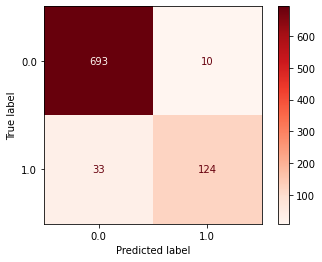

In [110]:
clf7 = gsearch4.best_estimator_
clf7.fit(X_train_processed_df, y_train)
test_results(clf7, X_train_processed_df, X_test_processed_df, y_train, y_test)

## Recommendations

With the XGBoost model, no variable by itself has a strong correlation with depression. However, some of the variables that do rank highest are asset_savings, med expenses, own farm, fs_adwholed, not having mpesa, and having asset savings. The company should look closely at individuals who don't have savings or are struggling financally, individuals without children and individuals with high medical expenses. 

In [111]:
pd.DataFrame({'Variable':X_train_processed_df.columns,
              'Importance':clf7.feature_importances_}).sort_values('Importance', ascending=False).head(20)

,Variable,Importance
269,asset_savings_False,0.043887
270,asset_savings_True,0.043364
11,fs_adwholed_often,0.041063
12,fs_chskipm_often,0.037358
20,ed_work_act_pc,0.034670
5,cons_social,0.034147
4,cons_ownfood,0.033775
16,med_expenses_sp_ep,0.033664
10,fs_adskipm_often,0.033138
7,ent_farmrevenue,0.033106


## Conclusions

This data was difficult to create an accurate and useful model for due to missing values and few entries for depression. Depression is a complex condition, so it makes sense that creating a model to predict it would be equally complex.  It was also difficult with the given values to find values highly correlated with depression.  

Having children seems to be a protective factor. Individuals without savings or with high medical expenses seem to be at higher risk for depression.  

To continue researching this, data needs to include a greater number of depressed clients. Future surveys could measure more social areas as well as individual's perception of quality of life, including having clients rate the quality of their social life, family relationships, financial stability, job happiness, as well as education level, race, gender identity, and age.  

## Future Work

Future work can focus on exploring more data, especially of depressed individuals.  It could explore the correlations of perception of family relationships, social relationships, and financial stability with depression.  It would also be interesting to look at whether having friends who are depressed impacts an individual's likelihood of having depression. With more data and categories, I would want to create a scale based on the results that would look at the likelihood for depression based on various aspects of their life.  I'd also continue tuning the model to decrease overfitting and improve the recall scores. 